In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = np.genfromtxt('data_banknote_authentication.txt', delimiter = ',')
X = data[:,:4]
y = data[:, 4]

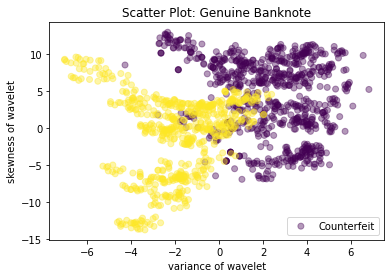

In [8]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, c=y, cmap='viridis')
plt.xlabel('variance of wavelet')
plt.ylabel('skewness of wavelet')
plt.title("Scatter Plot: Genuine Banknote")
plt.legend(['Counterfeit','Genuine'],loc="lower right")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=54)

X_train = X_train.T
y_train = y_train.reshape(1,y_train.shape[0])

X_test = X_test.T
y_test = y_test.reshape(1,y_test.shape[0])

print(f'Train X Shape: {X_train.shape}')
print(f'Train Y Shape: {y_train.shape}')
print(f'Number of training samples: {X_train.shape[1]}')

print('Test X Shape: ',X_test.shape)

Train X Shape: (4, 1097)
Train Y Shape: (1, 1097)
Number of training samples: 1097
Test X Shape:  (4, 275)


In [11]:
def init_struct(X,Y):
    input_layer = X.shape[0]
    hidden_layer = 4
    output_layer = Y.shape[0]
    return (input_layer,hidden_layer,output_layer)

(i_layer,h_layer,o_layer) = init_struct(X_train,y_train)
print("The size of input layer is: ",i_layer)
print("The size of hidden layer is: ",h_layer)
print("The size of output layer is: ",o_layer)

The size of input layer is:  4
The size of hidden layer is:  4
The size of output layer is:  1


In [12]:
def init_params(i_l,h_l,o_l):
    np.random.seed(3)
    W1 = np.random.randn(h_l,i_l)*0.01
    b1 = np.zeros((h_l,1))
    W2 = np.random.randn(o_l,h_l)*0.01
    b2 = np.zeros((o_l,1))
    params = {"W1":W1, "b1": b1, "W2":W2, "b2":b2}
    return params

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def for_prop(X,params):
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2}
    return A2, cache

def cross_entropy_cost(A2, Y, params):
    num = Y.shape[1]
    logprobs=np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = - np.sum(logprobs) / num
    cost = float(np.squeeze(cost))
    return cost


In [19]:
def back_prop(params,cache,X,Y):
    num = X.shape[1]
    W1 = params['W1']
    W2 = params['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    dZ2 = A2 - Y
    dW2 = (1/num) * np.dot(dZ2, A1.T)
    db2 = (1/num) * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),1 - np.power(A1,2))
    dW1 = (1/num) * np.dot(dZ1,X.T)
    db1 = (1/num)*np.sum(dZ1,axis=1,keepdims=True)

    grads = {"dW1":dW1, "db1":db1, "dW2":dW2, "db2" : db2}
    return grads

def grad_desc(params,grads,learning_rate = 0.01):
    W1 = params['W1']
    W2 = params['W2']
    b1 = params['b1']
    b2 = params['b2']

    dW1 = grads['dW1']
    dW2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    params = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    return params

In [20]:
def neural_net(X,Y,h_layer,iters=1000):
    np.random.seed(4)
    i_layer = init_struct(X,Y)[0]
    o_layer = init_struct(X,Y)[2]
    params = init_params(i_layer,h_layer,o_layer)
    
    W1 = params['W1']
    W2 = params['W2']
    b1 = params['b1']
    b2 = params['b2']

    for i in range(iters):
        A2,cache = for_prop(X, params)
        cost = cross_entropy_cost(A2,Y,params)
        grads = back_prop(params,cache,X,Y)
        params = grad_desc(params,grads)
        if i%10==0:
            print(f"Cost after iteration {i} is {cost}")
    return params

params = neural_net(X_train,y_train,4,iters=1000)

Cost after iteration 0 is 0.6927231179460064
Cost after iteration 10 is 0.6921255875011809
Cost after iteration 20 is 0.6914613052584071
Cost after iteration 30 is 0.6906874711484721
Cost after iteration 40 is 0.6897528523770746
Cost after iteration 50 is 0.6885959178647798
Cost after iteration 60 is 0.6871440814188834
Cost after iteration 70 is 0.6853146356869115
Cost after iteration 80 is 0.6830178095583002
Cost after iteration 90 is 0.6801619185769475
Cost after iteration 100 is 0.6766599072594671
Cost after iteration 110 is 0.6724359954641326
Cost after iteration 120 is 0.6674309318977679
Cost after iteration 130 is 0.661604618558593
Cost after iteration 140 is 0.6549354873479207
Cost after iteration 150 is 0.6474168271610113
Cost after iteration 160 is 0.6390511584167147
Cost after iteration 170 is 0.6298445414323651
Cost after iteration 180 is 0.6198030284096603
Cost after iteration 190 is 0.6089329924000888
Cost after iteration 200 is 0.5972457887750526
Cost after iteration 210 

In [23]:
def prediction(params,X):
    A2,cache = for_prop(X,params)
    predictions = np.round(A2)
    return predictions

predictions = prediction(params,X_train)
print(f'Training Accuracy: {float((np.dot(y_train,predictions.T) + np.dot(1- y_train,1- predictions.T))/float(y_train.size)*100)}')

predictions = prediction(params,X_test)
print(f'Testing Accuracy: {float((np.dot(y_test,predictions.T) + np.dot(1- y_test,1- predictions.T))/float(y_test.size)*100)}')


Training Accuracy: 98.26800364630812
Testing Accuracy: 97.81818181818181
